In [1]:
from __future__ import division, print_function, absolute_import

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
    
import numpy as np
import pandas as pd
from models.nnet import DeepNet
from plots import Plot

import logging
logging.basicConfig(level=logging.DEBUG, filename="logfile.log", filemode="w",
                    format="%(asctime)-15s %(levelname)-8s %(message)s")


import warnings
warnings.filterwarnings('ignore')

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")

# MODEL 1: 
---------

In [2]:
layers = [20, 20, 20, 2]
batch_size = 2048
display_step = 10
num_epochs = 500
learning_rate = 0.005
lamda = 0
reg = False

(tr_loss_arr, tr_acc_arr, tr_precision_arr, tr_recall_arr,
 cv_loss_arr, cv_acc_arr, cv_precision_arr, cv_recall_arr,
 tsacc, ts_precsion_score, ts_recall_score) = nnet(layers, batch_size, display_step, num_epochs, learning_rate, lamda, regularize=reg)

Full data Shape, dataX.shape = (284807, 29), dataY.shape = (284807, 1), len(xFeatures) = 29, yLabel = Index(['Class'], dtype='object') 

trainX.shape = (230693, 29), trainY.shape = (230693, 1), testX.shape = (28481, 29), testY.shape = (28481, 1), cvalidX.shape = (25633, 29), cvalidY.shape = (25633, 1) 

One-hot conversion shape: testY_1hot.shape = (28481, 2), trainY_1hot.shape = (230693, 2), cvalidY_1hot=1 = (25633, 2) 

Input trainX.shape=(230693, 29) and trainY.shape=(230693, 1)
Upscaled Training Data: trX.shape = (460584, 29), trY.shape = (460584,), trY=1 = 230292, trY=0 = 230292 



In [3]:
print ('Mean Values: train_loss = %s, train_acc = %s, train_precision = %s, train_recall = %s, cv_loss = %s, cv_acc = %s, cv_precision = %s, cv_recall = %s, test_acc = %s, test_precision = %s, test_recall = %s'%(str(np.mean(tr_loss_arr)), str(np.mean(tr_acc_arr)), 
str(np.mean(tr_precision_arr)), str(np.mean(tr_recall_arr)), str(np.mean(cv_loss_arr)), str(np.mean(cv_acc_arr)), str(np.mean(cv_precision_arr)), str(np.mean(cv_recall_arr)), str(tsacc), str(ts_precsion_score), str(ts_recall_score)))

Mean Values: train_loss = 0.00250726, train_acc = 0.999435, train_precision = 0.817464556709, train_recall = 0.999301745636, cv_loss = 0.0123255, cv_acc = 0.998567, cv_precision = 0.583053698549, cv_recall = 0.848636363636, test_acc = 0.998631, test_precision = 0.554054054054, test_recall = 0.872340425532


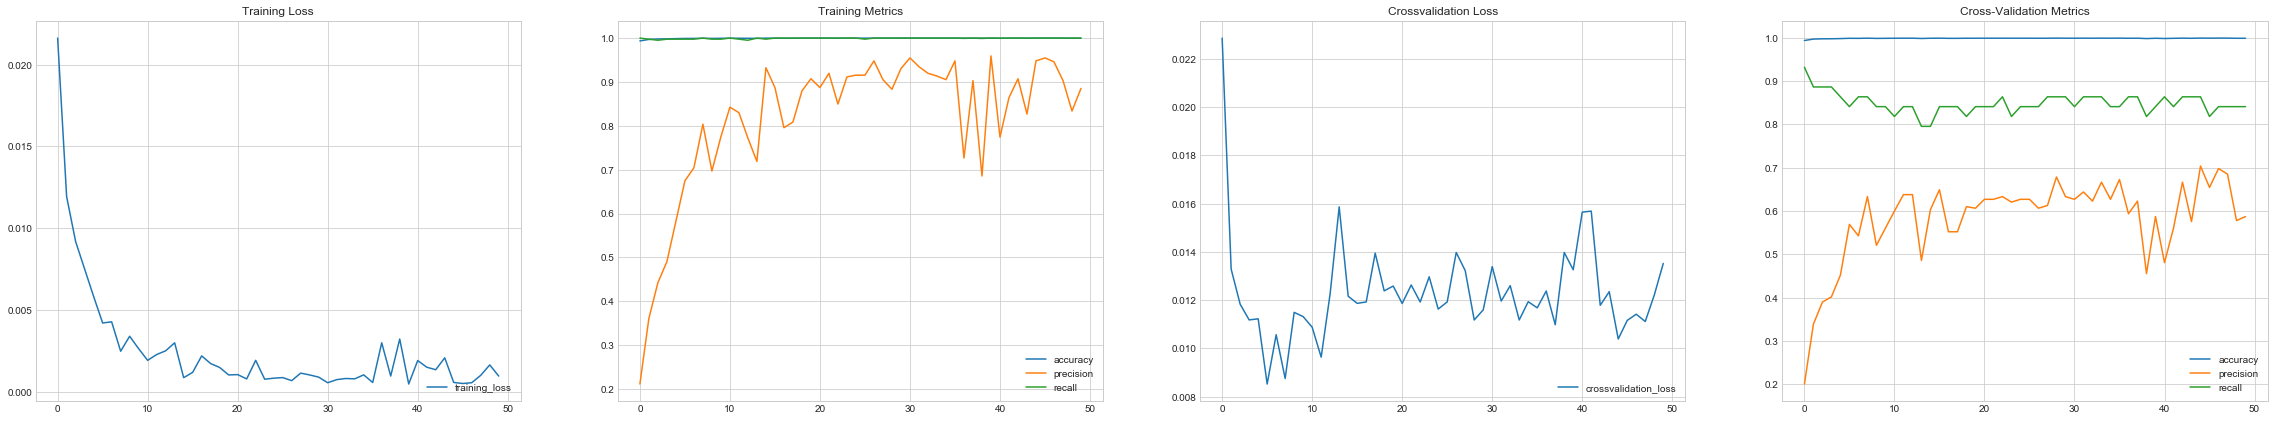

In [4]:
oj = Plot(rows=1, columns=4, fig_size=(40,7))
tr_loss_df = pd.DataFrame(tr_loss_arr, columns=['training_loss'])
oj.vizualize(data=tr_loss_df, colX=None, colY=None, label_col=None, viz_type='line', params={'title':'Training Loss'})
tr_data = pd.DataFrame(np.column_stack((tr_acc_arr, tr_precision_arr, tr_recall_arr)), columns=['accuracy', 'precision', 'recall'])
oj.vizualize(data=tr_data, colX=None, colY=None, label_col=None, viz_type='line', params={'title':'Training Metrics'})

cv_loss_df = pd.DataFrame(cv_loss_arr, columns=['crossvalidation_loss'])
oj.vizualize(data=cv_loss_df, colX=None, colY=None, label_col=None, viz_type='line', params={'title':'Crossvalidation Loss'})
cv_data = pd.DataFrame(np.column_stack((cv_acc_arr, cv_precision_arr, cv_recall_arr)), columns=['accuracy', 'precision', 'recall'])
oj.vizualize(data=cv_data, colX=None, colY=None, label_col=None, viz_type='line', params={'title':'Cross-Validation Metrics'})

# MODEL 2: Adding Regularization
----------

The Training Loss, Cross Validation loss both seems to be very very similar, So we could hypothesize that the model is atleast not overfitting. However the Precision of goes down a lot.
* We need to improve on Precision

In [5]:
layers = [20, 20, 20, 2]
batch_size = 2048
display_step = 10
num_epochs = 500
learning_rate = 0.005
lamda = 0.01

(tr_loss_arr, tr_acc_arr, tr_precision_arr, tr_recall_arr,
 cv_loss_arr, cv_acc_arr, cv_precision_arr, cv_recall_arr,
 tsacc, ts_precsion_score, ts_recall_score) = nnet(layers, batch_size, display_step, num_epochs, learning_rate, lamda, regularize=True)

Full data Shape, dataX.shape = (284807, 29), dataY.shape = (284807, 1), len(xFeatures) = 29, yLabel = Index(['Class'], dtype='object') 

trainX.shape = (230693, 29), trainY.shape = (230693, 1), testX.shape = (28481, 29), testY.shape = (28481, 1), cvalidX.shape = (25633, 29), cvalidY.shape = (25633, 1) 

One-hot conversion shape: testY_1hot.shape = (28481, 2), trainY_1hot.shape = (230693, 2), cvalidY_1hot=1 = (25633, 2) 

Input trainX.shape=(230693, 29) and trainY.shape=(230693, 1)
Upscaled Training Data: trX.shape = (460584, 29), trY.shape = (460584,), trY=1 = 230292, trY=0 = 230292 



In [6]:
print ('Mean Values: train_loss = %s, train_acc = %s, train_precision = %s, train_recall = %s, cv_loss = %s, cv_acc = %s, cv_precision = %s, cv_recall = %s, test_acc = %s, test_precision = %s, test_recall = %s'%(str(np.mean(tr_loss_arr)), str(np.mean(tr_acc_arr)), 
str(np.mean(tr_precision_arr)), str(np.mean(tr_recall_arr)), str(np.mean(cv_loss_arr)), str(np.mean(cv_acc_arr)), str(np.mean(cv_precision_arr)), str(np.mean(cv_recall_arr)), str(tsacc), str(ts_precsion_score), str(ts_recall_score)))

Mean Values: train_loss = 0.0609311, train_acc = 0.99273, train_precision = 0.197442958153, train_recall = 0.96029925187, cv_loss = 0.0611762, cv_acc = 0.992926, cv_precision = 0.189232124375, cv_recall = 0.866363636364, test_acc = 0.993364, test_precision = 0.185840707965, test_recall = 0.893617021277


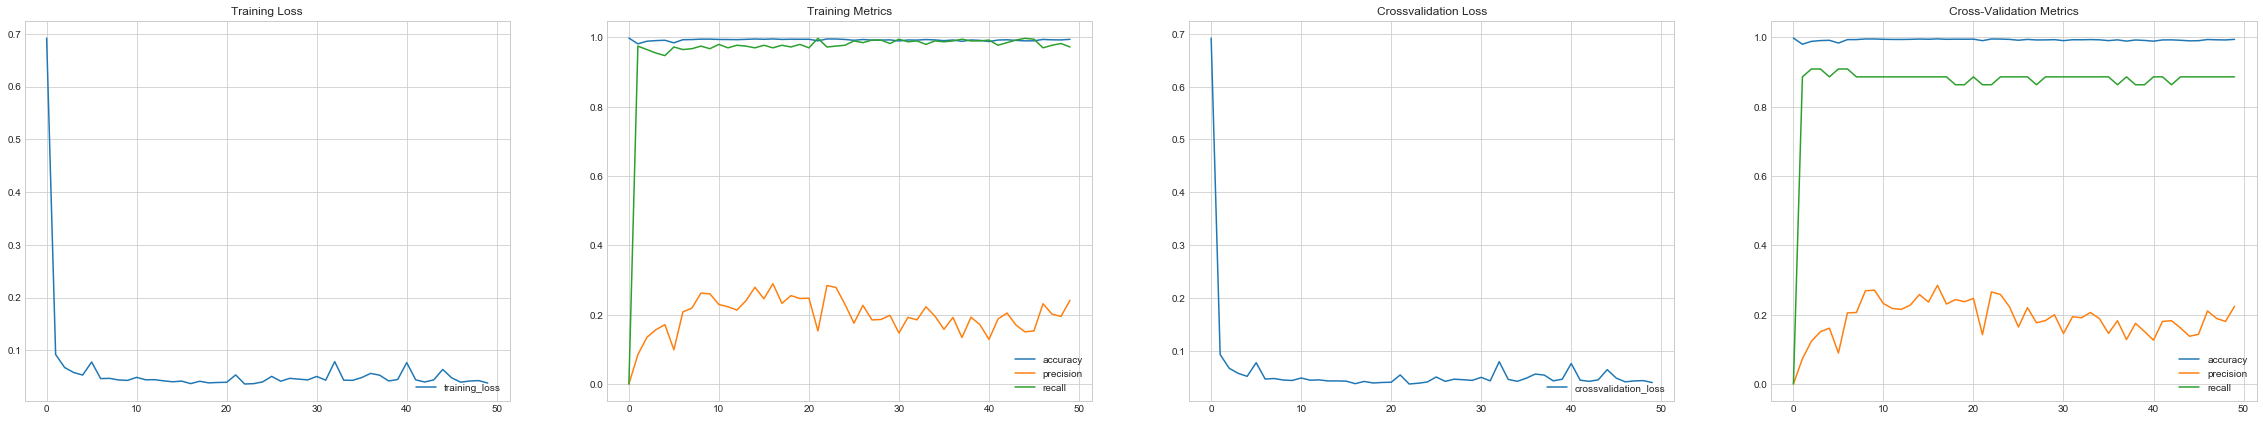

In [7]:
oj = Plot(rows=1, columns=4, fig_size=(40,7))
tr_loss_df = pd.DataFrame(tr_loss_arr, columns=['training_loss'])
oj.vizualize(data=tr_loss_df, colX=None, colY=None, label_col=None, viz_type='line', params={'title':'Training Loss'})
tr_data = pd.DataFrame(np.column_stack((tr_acc_arr, tr_precision_arr, tr_recall_arr)), columns=['accuracy', 'precision', 'recall'])
oj.vizualize(data=tr_data, colX=None, colY=None, label_col=None, viz_type='line', params={'title':'Training Metrics'})

cv_loss_df = pd.DataFrame(cv_loss_arr, columns=['crossvalidation_loss'])
oj.vizualize(data=cv_loss_df, colX=None, colY=None, label_col=None, viz_type='line', params={'title':'Crossvalidation Loss'})
cv_data = pd.DataFrame(np.column_stack((cv_acc_arr, cv_precision_arr, cv_recall_arr)), columns=['accuracy', 'precision', 'recall'])
oj.vizualize(data=cv_data, colX=None, colY=None, label_col=None, viz_type='line', params={'title':'Cross-Validation Metrics'})

In [4]:
layers = [20, 20, 20, 2]
batch_size = 2048
display_step = 10
num_epochs = 500
learning_rate = 0.05
lamda = 0.0001
reg = True

(tr_loss_arr, tr_acc_arr, tr_precision_arr, tr_recall_arr, tr_auc_arr,
cv_loss_arr, cv_acc_arr, cv_precision_arr, cv_recall_arr, cv_auc_arr,
tsacc, ts_precsion_score, ts_recall_score, ts_auc_score) = nnet(layers, batch_size, display_step, num_epochs, learning_rate, lamda, regularize=reg)

print ('Mean Values: train_loss = %s, train_acc = %s, train_precision = %s, train_recall = %s, cv_loss = %s, cv_acc = %s, cv_precision = %s, cv_recall = %s, test_acc = %s, test_precision = %s, test_recall = %s'%(str(np.mean(tr_loss_arr)), str(np.mean(tr_acc_arr)), 
str(np.mean(tr_precision_arr)), str(np.mean(tr_recall_arr)), str(np.mean(cv_loss_arr)), str(np.mean(cv_acc_arr)), str(np.mean(cv_precision_arr)), str(np.mean(cv_recall_arr)), str(tsacc), str(ts_precsion_score), str(ts_recall_score)))

Mean Values: train_loss = 0.0333375, train_acc = 0.994605, train_precision = 0.275585761485, train_recall = 0.992568578554, cv_loss = 0.0356813, cv_acc = 0.994275, cv_precision = 0.246797906938, cv_recall = 0.889545454545, test_acc = 0.997261, test_precision = 0.367521367521, test_recall = 0.914893617021


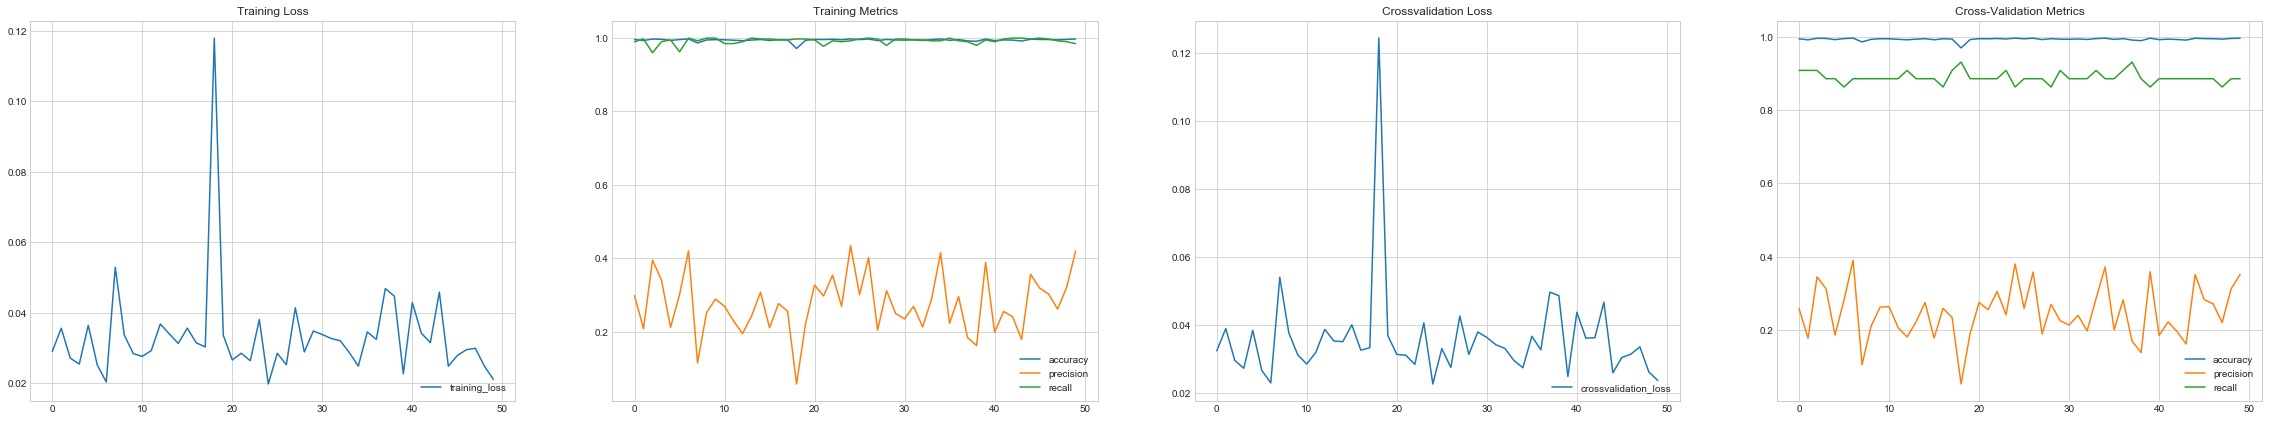

In [5]:
oj = Plot(rows=1, columns=4, fig_size=(40,7))
tr_loss_df = pd.DataFrame(tr_loss_arr, columns=['training_loss'])
oj.vizualize(data=tr_loss_df, colX=None, colY=None, label_col=None, viz_type='line', params={'title':'Training Loss'})
tr_data = pd.DataFrame(np.column_stack((tr_acc_arr, tr_precision_arr, tr_recall_arr)), columns=['accuracy', 'precision', 'recall'])
oj.vizualize(data=tr_data, colX=None, colY=None, label_col=None, viz_type='line', params={'title':'Training Metrics'})

cv_loss_df = pd.DataFrame(cv_loss_arr, columns=['crossvalidation_loss'])
oj.vizualize(data=cv_loss_df, colX=None, colY=None, label_col=None, viz_type='line', params={'title':'Crossvalidation Loss'})
cv_data = pd.DataFrame(np.column_stack((cv_acc_arr, cv_precision_arr, cv_recall_arr)), columns=['accuracy', 'precision', 'recall'])
oj.vizualize(data=cv_data, colX=None, colY=None, label_col=None, viz_type='line', params={'title':'Cross-Validation Metrics'})

# Model 2 augmented (Learning Rate Decay)
-----------

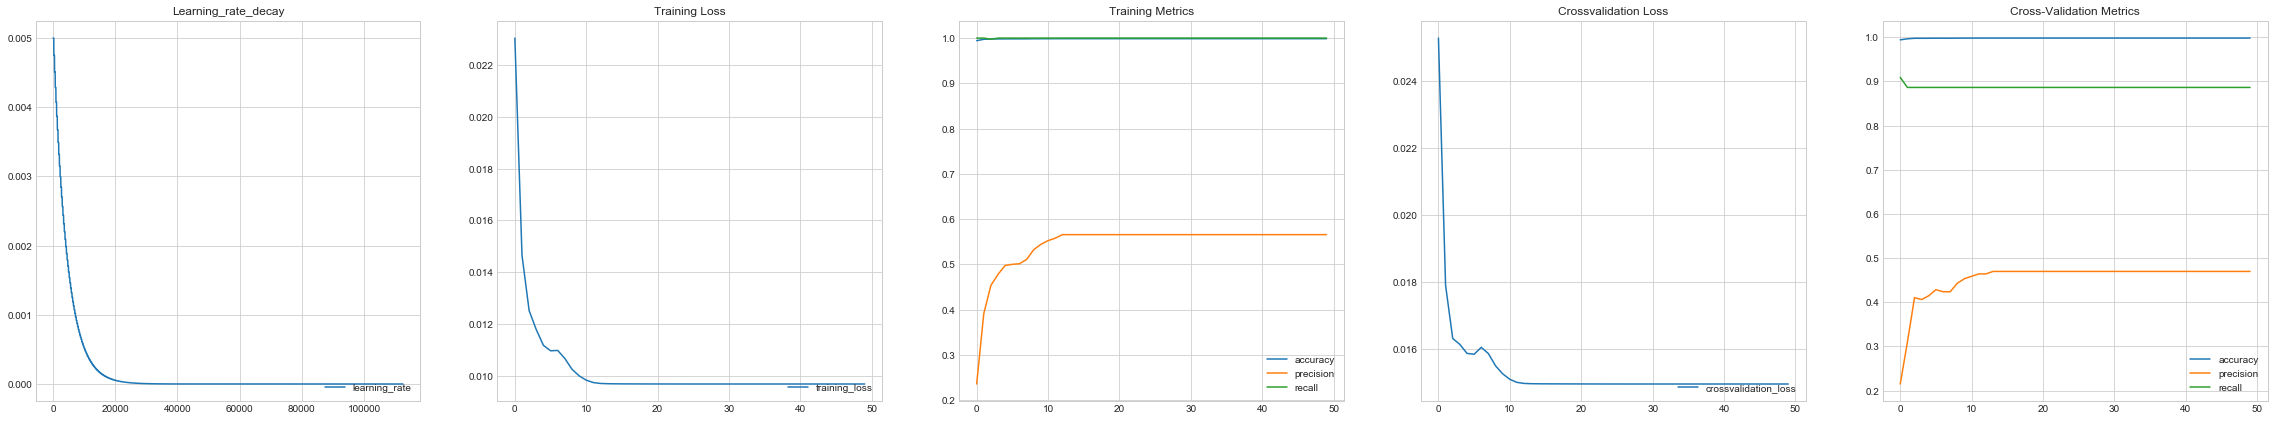

In [3]:
obj_dn = DeepNet(learning_rate = 0.005, lamda = 0.0001, learning_rate_decay = 0.95, REGULARIZE=True, LEARNING_RATE_DECAY=True, BATCH_NORM=False)

layers=layers = [20, 20, 20, 2]
batch_size = 2048 
num_epochs = 500
display_step = 10

(l_rate_arr, tr_loss_arr, tr_acc_arr, tr_precision_arr, tr_recall_arr, tr_auc_arr,
cv_loss_arr, cv_acc_arr, cv_precision_arr, cv_recall_arr, cv_auc_arr,
tsacc, ts_precsion_score, ts_recall_score, ts_auc_score) = obj_dn.nnet(layers, batch_size, num_epochs, display_step)

print ('Mean Values: train_loss = %s, train_acc = %s, train_precision = %s, train_recall = %s, cv_loss = %s, cv_acc = %s, cv_precision = %s, cv_recall = %s, test_acc = %s, test_precision = %s, test_recall = %s'%(str(np.mean(tr_loss_arr)), str(np.mean(tr_acc_arr)), 
str(np.mean(tr_precision_arr)), str(np.mean(tr_recall_arr)), str(np.mean(cv_loss_arr)), str(np.mean(cv_acc_arr)), str(np.mean(cv_precision_arr)), str(np.mean(cv_recall_arr)), str(tsacc), str(ts_precsion_score), str(ts_recall_score)))

oj = Plot(rows=1, columns=5, fig_size=(40,7))
tr_loss_df = pd.DataFrame(l_rate_arr, columns=['learning_rate'])
oj.vizualize(data=tr_loss_df, colX=None, colY=None, label_col=None, viz_type='line', params={'title':'Learning_rate_decay'})
tr_loss_df = pd.DataFrame(tr_loss_arr, columns=['training_loss'])
oj.vizualize(data=tr_loss_df, colX=None, colY=None, label_col=None, viz_type='line', params={'title':'Training Loss'})
tr_data = pd.DataFrame(np.column_stack((tr_acc_arr, tr_precision_arr, tr_recall_arr)), columns=['accuracy', 'precision', 'recall'])
oj.vizualize(data=tr_data, colX=None, colY=None, label_col=None, viz_type='line', params={'title':'Training Metrics'})

cv_loss_df = pd.DataFrame(cv_loss_arr, columns=['crossvalidation_loss'])
oj.vizualize(data=cv_loss_df, colX=None, colY=None, label_col=None, viz_type='line', params={'title':'Crossvalidation Loss'})
cv_data = pd.DataFrame(np.column_stack((cv_acc_arr, cv_precision_arr, cv_recall_arr)), columns=['accuracy', 'precision', 'recall'])
oj.vizualize(data=cv_data, colX=None, colY=None, label_col=None, viz_type='line', params={'title':'Cross-Validation Metrics'})

### Learning Rate: Decay Slowed

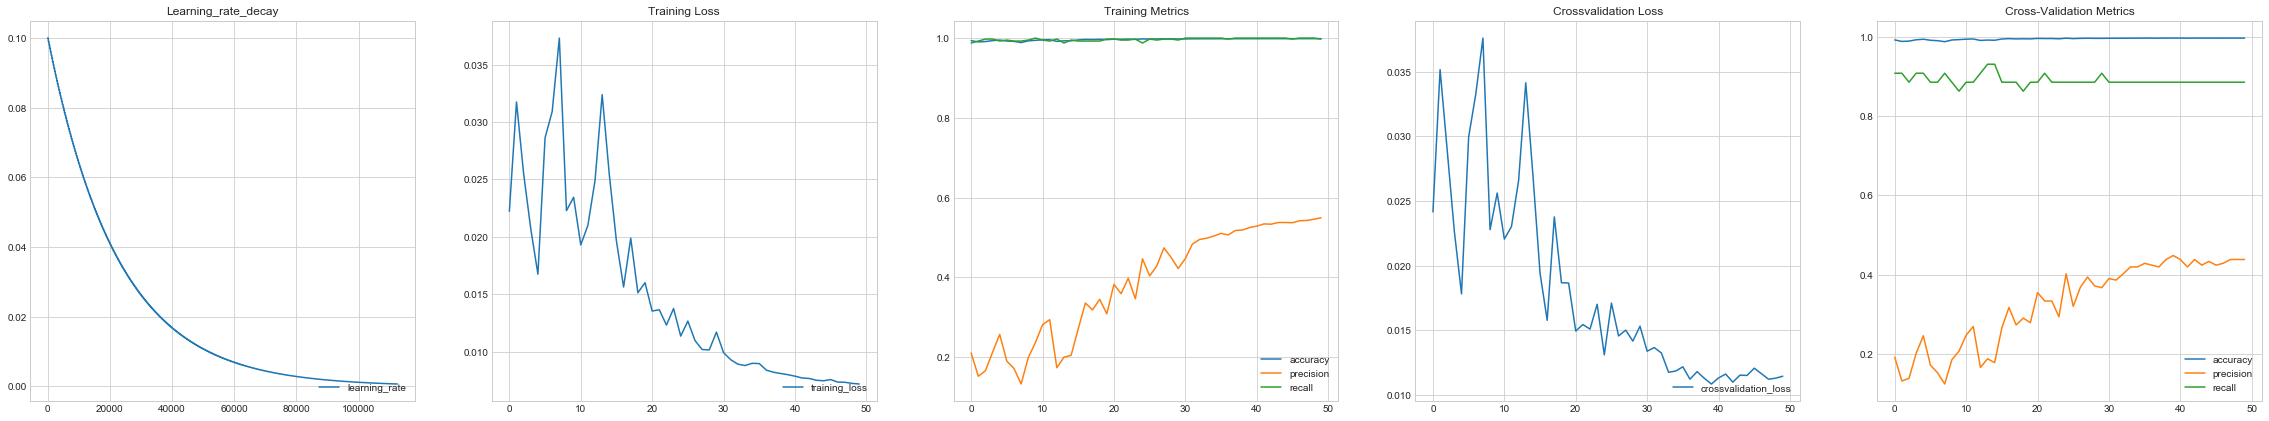

In [3]:
obj_dn = DeepNet(learning_rate = 0.1, lamda = 0.001, learning_rate_decay = 0.99, REGULARIZE=False, LEARNING_RATE_DECAY=True, BATCH_NORM=False)

layers=layers = [20, 20, 20, 2]
batch_size = 2048 
num_epochs = 500
display_step = 10

(l_rate_arr, tr_loss_arr, tr_acc_arr, tr_precision_arr, tr_recall_arr, tr_auc_arr,
cv_loss_arr, cv_acc_arr, cv_precision_arr, cv_recall_arr, cv_auc_arr,
tsacc, ts_precsion_score, ts_recall_score, ts_auc_score) = obj_dn.nnet(layers, batch_size, num_epochs, display_step)

print ('Mean Values: train_loss = %s, train_acc = %s, train_precision = %s, train_recall = %s, cv_loss = %s, cv_acc = %s, cv_precision = %s, cv_recall = %s, test_acc = %s, test_precision = %s, test_recall = %s'%(str(np.mean(tr_loss_arr)), str(np.mean(tr_acc_arr)), 
str(np.mean(tr_precision_arr)), str(np.mean(tr_recall_arr)), str(np.mean(cv_loss_arr)), str(np.mean(cv_acc_arr)), str(np.mean(cv_precision_arr)), str(np.mean(cv_recall_arr)), str(tsacc), str(ts_precsion_score), str(ts_recall_score)))

oj = Plot(rows=1, columns=5, fig_size=(40,7))
tr_loss_df = pd.DataFrame(l_rate_arr, columns=['learning_rate'])
oj.vizualize(data=tr_loss_df, colX=None, colY=None, label_col=None, viz_type='line', params={'title':'Learning_rate_decay'})
tr_loss_df = pd.DataFrame(tr_loss_arr, columns=['training_loss'])
oj.vizualize(data=tr_loss_df, colX=None, colY=None, label_col=None, viz_type='line', params={'title':'Training Loss'})
tr_data = pd.DataFrame(np.column_stack((tr_acc_arr, tr_precision_arr, tr_recall_arr)), columns=['accuracy', 'precision', 'recall'])
oj.vizualize(data=tr_data, colX=None, colY=None, label_col=None, viz_type='line', params={'title':'Training Metrics'})

cv_loss_df = pd.DataFrame(cv_loss_arr, columns=['crossvalidation_loss'])
oj.vizualize(data=cv_loss_df, colX=None, colY=None, label_col=None, viz_type='line', params={'title':'Crossvalidation Loss'})
cv_data = pd.DataFrame(np.column_stack((cv_acc_arr, cv_precision_arr, cv_recall_arr)), columns=['accuracy', 'precision', 'recall'])
oj.vizualize(data=cv_data, colX=None, colY=None, label_col=None, viz_type='line', params={'title':'Cross-Validation Metrics'})

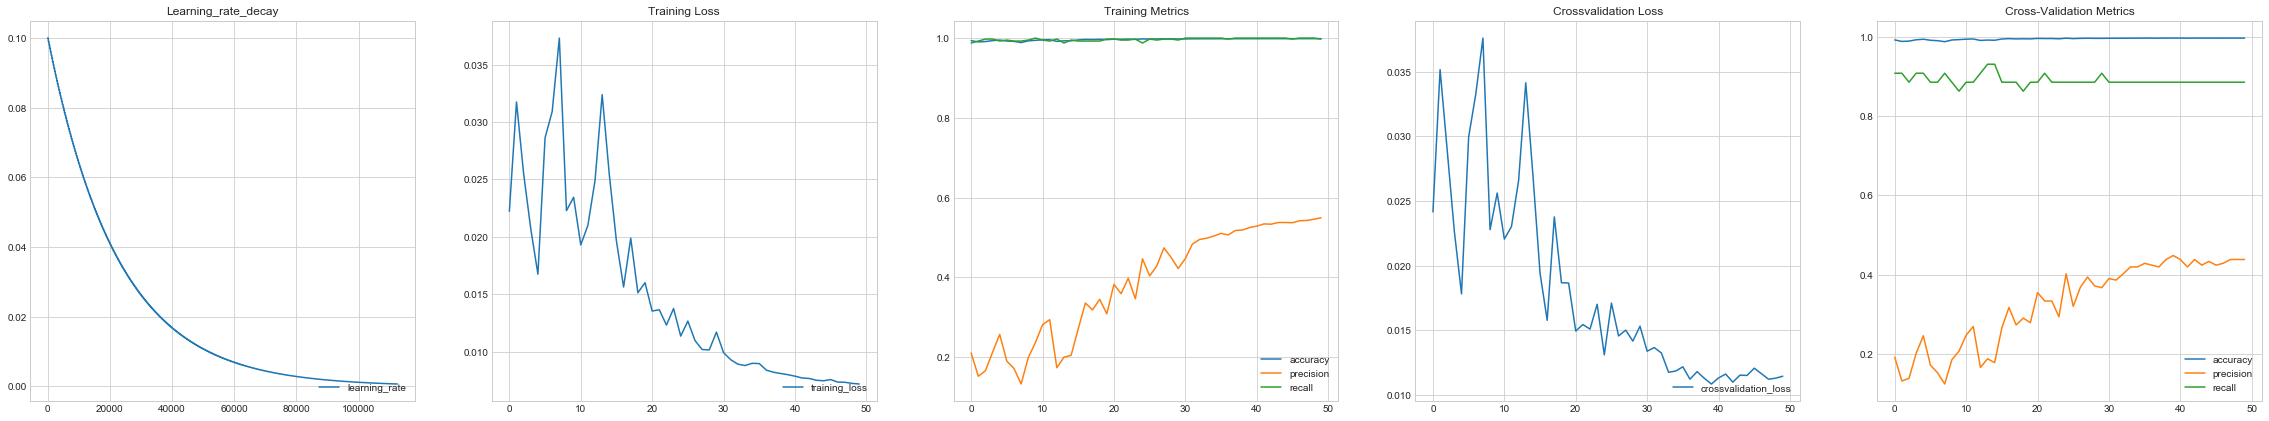

In [7]:
obj_dn = DeepNet(learning_rate = 0.1, lamda = 0.0001, learning_rate_decay = 0.99, REGULARIZE=False, LEARNING_RATE_DECAY=True, BATCH_NORM=False)

layers=layers = [20, 20, 20, 2]
batch_size = 2048 
num_epochs = 500
display_step = 10

(l_rate_arr, tr_loss_arr, tr_acc_arr, tr_precision_arr, tr_recall_arr, tr_auc_arr,
cv_loss_arr, cv_acc_arr, cv_precision_arr, cv_recall_arr, cv_auc_arr,
tsacc, ts_precsion_score, ts_recall_score, ts_auc_score) = obj_dn.nnet(layers, batch_size, num_epochs, display_step)

print ('Mean Values: train_loss = %s, train_acc = %s, train_precision = %s, train_recall = %s, cv_loss = %s, cv_acc = %s, cv_precision = %s, cv_recall = %s, test_acc = %s, test_precision = %s, test_recall = %s'%(str(np.mean(tr_loss_arr)), str(np.mean(tr_acc_arr)), 
str(np.mean(tr_precision_arr)), str(np.mean(tr_recall_arr)), str(np.mean(cv_loss_arr)), str(np.mean(cv_acc_arr)), str(np.mean(cv_precision_arr)), str(np.mean(cv_recall_arr)), str(tsacc), str(ts_precsion_score), str(ts_recall_score)))


oj = Plot(rows=1, columns=5, fig_size=(40,7))
tr_loss_df = pd.DataFrame(l_rate_arr, columns=['learning_rate'])
oj.vizualize(data=tr_loss_df, colX=None, colY=None, label_col=None, viz_type='line', params={'title':'Learning_rate_decay'})
tr_loss_df = pd.DataFrame(tr_loss_arr, columns=['training_loss'])
oj.vizualize(data=tr_loss_df, colX=None, colY=None, label_col=None, viz_type='line', params={'title':'Training Loss'})
tr_data = pd.DataFrame(np.column_stack((tr_acc_arr, tr_precision_arr, tr_recall_arr)), columns=['accuracy', 'precision', 'recall'])
oj.vizualize(data=tr_data, colX=None, colY=None, label_col=None, viz_type='line', params={'title':'Training Metrics'})

cv_loss_df = pd.DataFrame(cv_loss_arr, columns=['crossvalidation_loss'])
oj.vizualize(data=cv_loss_df, colX=None, colY=None, label_col=None, viz_type='line', params={'title':'Crossvalidation Loss'})
cv_data = pd.DataFrame(np.column_stack((cv_acc_arr, cv_precision_arr, cv_recall_arr)), columns=['accuracy', 'precision', 'recall'])
oj.vizualize(data=cv_data, colX=None, colY=None, label_col=None, viz_type='line', params={'title':'Cross-Validation Metrics'})

In [ ]:
obj_dn = DeepNet(learning_rate = 0.5, lamda = 0.0001, learning_rate_decay = 0.99, REGULARIZE=False, LEARNING_RATE_DECAY=True, BATCH_NORM=False)

layers=layers = [20, 20, 20, 2]
batch_size = 2048 
num_epochs = 500
display_step = 10

(l_rate_arr, tr_loss_arr, tr_acc_arr, tr_precision_arr, tr_recall_arr, tr_auc_arr,
cv_loss_arr, cv_acc_arr, cv_precision_arr, cv_recall_arr, cv_auc_arr,
tsacc, ts_precsion_score, ts_recall_score, ts_auc_score) = obj_dn.nnet(layers, batch_size, num_epochs, display_step)

print ('Mean Values: train_loss = %s, train_acc = %s, train_precision = %s, train_recall = %s, cv_loss = %s, cv_acc = %s, cv_precision = %s, cv_recall = %s, test_acc = %s, test_precision = %s, test_recall = %s'%(str(np.mean(tr_loss_arr)), str(np.mean(tr_acc_arr)), 
str(np.mean(tr_precision_arr)), str(np.mean(tr_recall_arr)), str(np.mean(cv_loss_arr)), str(np.mean(cv_acc_arr)), str(np.mean(cv_precision_arr)), str(np.mean(cv_recall_arr)), str(tsacc), str(ts_precsion_score), str(ts_recall_score)))

oj = Plot(rows=1, columns=5, fig_size=(40,7))
tr_loss_df = pd.DataFrame(l_rate_arr, columns=['learning_rate'])
oj.vizualize(data=tr_loss_df, colX=None, colY=None, label_col=None, viz_type='line', params={'title':'Learning_rate_decay'})
tr_loss_df = pd.DataFrame(tr_loss_arr, columns=['training_loss'])
oj.vizualize(data=tr_loss_df, colX=None, colY=None, label_col=None, viz_type='line', params={'title':'Training Loss'})
tr_data = pd.DataFrame(np.column_stack((tr_acc_arr, tr_precision_arr, tr_recall_arr)), columns=['accuracy', 'precision', 'recall'])
oj.vizualize(data=tr_data, colX=None, colY=None, label_col=None, viz_type='line', params={'title':'Training Metrics'})

cv_loss_df = pd.DataFrame(cv_loss_arr, columns=['crossvalidation_loss'])
oj.vizualize(data=cv_loss_df, colX=None, colY=None, label_col=None, viz_type='line', params={'title':'Crossvalidation Loss'})
cv_data = pd.DataFrame(np.column_stack((cv_acc_arr, cv_precision_arr, cv_recall_arr)), columns=['accuracy', 'precision', 'recall'])
oj.vizualize(data=cv_data, colX=None, colY=None, label_col=None, viz_type='line', params={'title':'Cross-Validation Metrics'})

Full data Shape, dataX.shape = (284807, 29), dataY.shape = (284807, 1), len(xFeatures) = 29, yLabel = Index(['Class'], dtype='object') 

trainX.shape = (230693, 29), trainY.shape = (230693, 1), testX.shape = (28481, 29), testY.shape = (28481, 1), cvalidX.shape = (25633, 29), cvalidY.shape = (25633, 1) 

One-hot conversion shape: testY_1hot.shape = (28481, 2), trainY_1hot.shape = (230693, 2), cvalidY_1hot=1 = (25633, 2) 

Input trainX.shape=(230693, 29) and trainY.shape=(230693, 1)
Upscaled Training Data: trX.shape = (460584, 29), trY.shape = (460584,), trY=1 = 230292, trY=0 = 230292 



# Model 3: Regularization Parameter Decreased, Less Penalty to the model
----------

It can be clearly seen that both the training loss and cross validation loss increases after epoch ~ 220, which means that we are overfitting after that point. Howver the test recall is very high, which is not justified by cross validation recall. The high Recall in the test could just be a good luck,

In [8]:
layers = [20, 20, 20, 2]
batch_size = 2048
display_step = 10
num_epochs = 500
learning_rate = 0.005
lamda = 0.001

(tr_loss_arr, tr_acc_arr, tr_precision_arr, tr_recall_arr,
 cv_loss_arr, cv_acc_arr, cv_precision_arr, cv_recall_arr,
 tsacc, ts_precsion_score, ts_recall_score) = nnet(layers, batch_size, display_step, num_epochs, learning_rate, lamda, regularize=True)

Full data Shape, dataX.shape = (284807, 29), dataY.shape = (284807, 1), len(xFeatures) = 29, yLabel = Index(['Class'], dtype='object') 

trainX.shape = (230693, 29), trainY.shape = (230693, 1), testX.shape = (28481, 29), testY.shape = (28481, 1), cvalidX.shape = (25633, 29), cvalidY.shape = (25633, 1) 

One-hot conversion shape: testY_1hot.shape = (28481, 2), trainY_1hot.shape = (230693, 2), cvalidY_1hot=1 = (25633, 2) 

Input trainX.shape=(230693, 29) and trainY.shape=(230693, 1)
Upscaled Training Data: trX.shape = (460584, 29), trY.shape = (460584,), trY=1 = 230292, trY=0 = 230292 



In [9]:
print ('Mean Values: train_loss = %s, train_acc = %s, train_precision = %s, train_recall = %s, cv_loss = %s, cv_acc = %s, cv_precision = %s, cv_recall = %s, test_acc = %s, test_precision = %s, test_recall = %s'%(str(np.mean(tr_loss_arr)), str(np.mean(tr_acc_arr)), 
str(np.mean(tr_precision_arr)), str(np.mean(tr_recall_arr)), str(np.mean(cv_loss_arr)), str(np.mean(cv_acc_arr)), str(np.mean(cv_precision_arr)), str(np.mean(cv_recall_arr)), str(tsacc), str(ts_precsion_score), str(ts_recall_score)))

Mean Values: train_loss = 0.0226533, train_acc = 0.996313, train_precision = 0.332391958557, train_recall = 0.99391521197, cv_loss = 0.0281289, cv_acc = 0.995805, cv_precision = 0.279551798274, cv_recall = 0.844090909091, test_acc = 0.995506, test_precision = 0.25748502994, test_recall = 0.914893617021


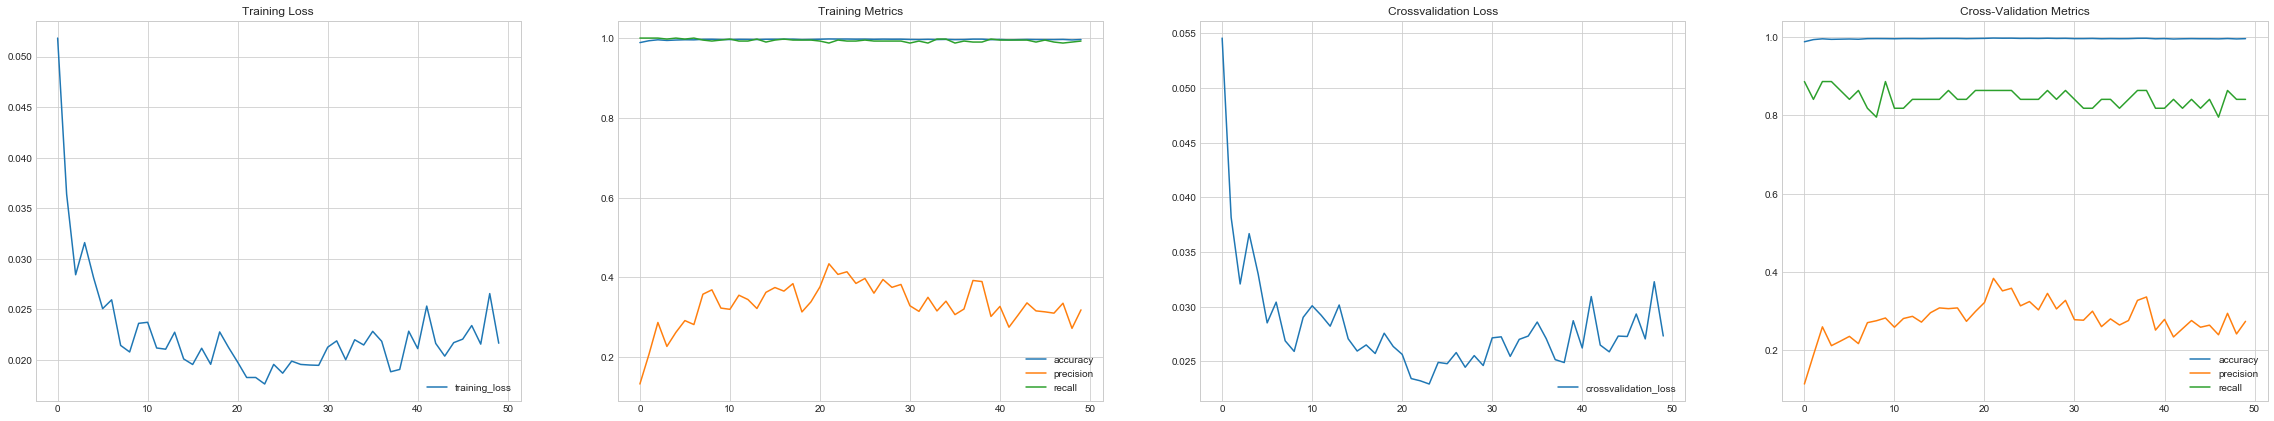

In [10]:
oj = Plot(rows=1, columns=4, fig_size=(40,7))
tr_loss_df = pd.DataFrame(tr_loss_arr, columns=['training_loss'])
oj.vizualize(data=tr_loss_df, colX=None, colY=None, label_col=None, viz_type='line', params={'title':'Training Loss'})
tr_data = pd.DataFrame(np.column_stack((tr_acc_arr, tr_precision_arr, tr_recall_arr)), columns=['accuracy', 'precision', 'recall'])
oj.vizualize(data=tr_data, colX=None, colY=None, label_col=None, viz_type='line', params={'title':'Training Metrics'})

cv_loss_df = pd.DataFrame(cv_loss_arr, columns=['crossvalidation_loss'])
oj.vizualize(data=cv_loss_df, colX=None, colY=None, label_col=None, viz_type='line', params={'title':'Crossvalidation Loss'})
cv_data = pd.DataFrame(np.column_stack((cv_acc_arr, cv_precision_arr, cv_recall_arr)), columns=['accuracy', 'precision', 'recall'])
oj.vizualize(data=cv_data, colX=None, colY=None, label_col=None, viz_type='line', params={'title':'Cross-Validation Metrics'})

# Model 4: Regularization More Penalty
---------

In [ ]:
layers = [20, 20, 20, 2]
batch_size = 2048
display_step = 10
num_epochs = 500
learning_rate = 0.005
lamda = 0.1

(tr_loss_arr, tr_acc_arr, tr_precision_arr, tr_recall_arr,
 cv_loss_arr, cv_acc_arr, cv_precision_arr, cv_recall_arr,
 tsacc, ts_precsion_score, ts_recall_score) = nnet(layers, batch_size, display_step, num_epochs, learning_rate, lamda, regularize=True)

Full data Shape, dataX.shape = (284807, 29), dataY.shape = (284807, 1), len(xFeatures) = 29, yLabel = Index(['Class'], dtype='object') 

trainX.shape = (230693, 29), trainY.shape = (230693, 1), testX.shape = (28481, 29), testY.shape = (28481, 1), cvalidX.shape = (25633, 29), cvalidY.shape = (25633, 1) 

One-hot conversion shape: testY_1hot.shape = (28481, 2), trainY_1hot.shape = (230693, 2), cvalidY_1hot=1 = (25633, 2) 

Input trainX.shape=(230693, 29) and trainY.shape=(230693, 1)
Upscaled Training Data: trX.shape = (460584, 29), trY.shape = (460584,), trY=1 = 230292, trY=0 = 230292 



## Model 5: Adding Batch Normalization in all the 3 layers:

In [2]:
layers = [20, 20, 20, 2]
batch_size = 2048
display_step = 10
num_epochs = 500
learning_rate = 0.005
lamda = 0.1
reg = False

(tr_loss_arr, tr_acc_arr, tr_precision_arr, tr_recall_arr,
 cv_loss_arr, cv_acc_arr, cv_precision_arr, cv_recall_arr,
 tsacc, ts_precsion_score, ts_recall_score) = nnet(layers, batch_size, display_step, num_epochs, learning_rate, lamda, regularize=reg)

Full data Shape, dataX.shape = (284807, 29), dataY.shape = (284807, 1), len(xFeatures) = 29, yLabel = Index(['Class'], dtype='object') 

trainX.shape = (230693, 29), trainY.shape = (230693, 1), testX.shape = (28481, 29), testY.shape = (28481, 1), cvalidX.shape = (25633, 29), cvalidY.shape = (25633, 1) 

One-hot conversion shape: testY_1hot.shape = (28481, 2), trainY_1hot.shape = (230693, 2), cvalidY_1hot=1 = (25633, 2) 

Input trainX.shape=(230693, 29) and trainY.shape=(230693, 1)
Upscaled Training Data: trX.shape = (460584, 29), trY.shape = (460584,), trY=1 = 230292, trY=0 = 230292 



KeyboardInterrupt: 

## NET BOOST:

In [2]:
layers = [20, 20, 20, 2]
batch_size = 2048
display_step = 20
num_epochs = 500
learning_rate = 0.005
lamda = 0.1
reg = False

net_boost(layers, batch_size, display_step, num_epochs, learning_rate, lamda, regularize=reg)

Full data Shape, dataX.shape = (284807, 29), dataY.shape = (284807, 1), len(xFeatures) = 29, yLabel = Index(['Class'], dtype='object') 

trainX.shape = (230693, 29), trainY.shape = (230693, 1), testX.shape = (28481, 29), testY.shape = (28481, 1), cvalidX.shape = (25633, 29), cvalidY.shape = (25633, 1) 

One-hot conversion shape: testY_1hot.shape = (28481, 2), trainY_1hot.shape = (230693, 2), cvalidY_1hot=1 = (25633, 2) 

Input trainX.shape=(230693, 29) and trainY.shape=(230693, 1)
Upscaled Training Data: trX.shape = (460584, 29), trY.shape = (460584,), trY=1 = 230292, trY=0 = 230292 

(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)


(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)


(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)


(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(1832,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)


(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(1832,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)
(2048,)


XGBoostError: b'[21:47:22] src/objective/regression_obj.cc:44: Check failed: preds->size() == info.labels.size() (230693 vs. 1832) labels are not correctly providedpreds.size=230693, label.size=1832\n\nStack trace returned 6 entries:\n[bt] (0) 0   libxgboost.dylib                    0x0000001a1935e9f8 _ZN4dmlc15LogMessageFatalD2Ev + 40\n[bt] (1) 1   libxgboost.dylib                    0x0000001a193d10f4 _ZN7xgboost3obj10RegLossObjINS0_22LogisticClassificationEE11GetGradientEPNS_16HostDeviceVectorIfEERKNS_8MetaInfoEiPNS4_INS_6detail18bst_gpair_internalIfEEEE + 596\n[bt] (2) 2   libxgboost.dylib                    0x0000001a1935acc6 _ZN7xgboost11LearnerImpl13UpdateOneIterEiPNS_7DMatrixE + 1014\n[bt] (3) 3   libxgboost.dylib                    0x0000001a19373c0f XGBoosterUpdateOneIter + 79\n[bt] (4) 4   libffi.6.dylib                      0x00000001096cf884 ffi_call_unix64 + 76\n[bt] (5) 5   ???                                 0x00007ffee7f5d7b0 0x0 + 140732790069168\n'